In [9]:
# ---------------- #

import numpy as np
import matplotlib.pyplot as plt

# ---------------- #

In [14]:
# ---------------- #

def solve_runge_kutta(f, y_0, t_0, T, A, b1, b2, p, h, h_min, tau, l, rho):

    t = [t_0]
    y = [y_0]
    h_array = []

    while t[-1] != T:

        h = min(T-t[-1], max(h_min,h))
        k = np.zeros((len(b1), 2))

        for j in range(len(b1)):
            k[j] = f(y[-1] + h*(A[j][:j] @ k[:j]))

        F1 = b1 @ k
        F2 = b2 @ k
        H  = rho * (tau / (np.linalg.norm(F1 - F2)))**(1/p) * h
#         print(np.linalg.norm(F1 - F2))

        if h <= H or h <= h_min:

            t.append(t[-1] + h)
            h_array.append(h)
            y.append(y[-1] + h*F2)

            if t[-1] < T:
                h = min(H, l*h)

        else:
            h = min(H, h/l)

    return t, h_array, np.array(y)

# ---------------- #

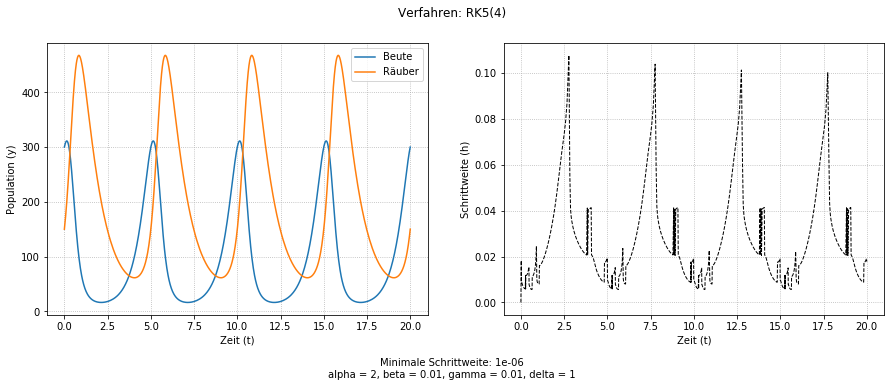

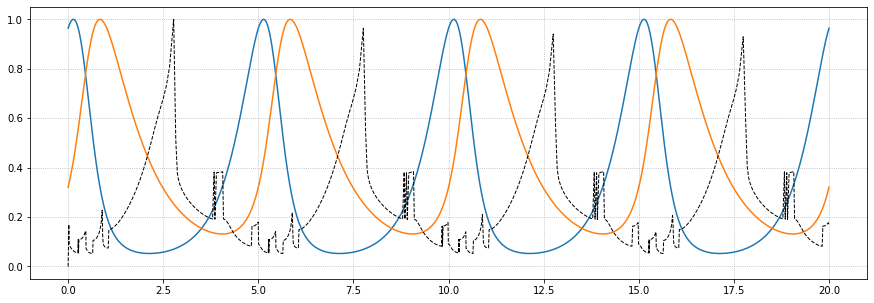

In [89]:
# ---------------- #

# Test-Parameter

alpha = 2
beta  = 0.01
delta = 1
gamma = 0.01

y_0 = np.array([300, 150])
initital_stepsize = 0.1
min_stepsize = 10**(-6)
tolerance = 10**(-6)
l = 2
rho = 0.8

t_0 = 0
T   = 100 / 5

def f(y):

    prey      = alpha*y[0]      - beta *y[0]*y[1]
    predators = gamma*y[0]*y[1] - delta*y[1]

    return np.array([prey, predators])

# ---------------- #

# Butcher tableau - RK5(4)
A = np.array([[0,           0,          0,           0,        0,            0,        0   ],
              [1    /5,     0,          0,           0,        0,            0,        0   ],
              [3    /40,    9    /40,   0,           0,        0,            0,        0   ],
              [44   /45,   -56   /15,   32   /9,     0,        0,            0,        0   ],
              [19372/6561, -25360/2187, 64448/6561, -212/729,  0,            0,        0   ],
              [9017 /3168, -355  /33,   46732/5247,  49 /176, -5103 /18656,  0,        0   ],
              [35   /384,   0,          500  /1113,  125/192, -2187 /6784,   11 /84,   0   ]])
b1 = np.array([35   /384,   0,          500  /1113,  125/192, -2187 /6784,   11 /84,   0   ])
b2 = np.array([5179 /57600, 0,          7571 /16695, 393/640, -92097/339200, 187/2100, 1/40])

# # Butcher tableau - RK4
# A = np.array([[0,   0,   0,   0  ],
#               [1/2, 0,   0,   0  ],
#               [0,   1/2, 0,   0  ],
#               [0,   0,   1,   0  ]])
# b  = np.array([1/6, 1/3, 1/3, 1/6])

# ---------------- #

t, h, y = solve_runge_kutta(f, y_0, t_0, T, A, b1, b2, 4, initital_stepsize, min_stepsize, tolerance, l, rho)

# ---------------- #

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))

caption = ""
caption += "Minimale Schrittweite: {0}".format(min_stepsize)
caption += "\n"
caption += "alpha = {0}, beta = {1}, gamma = {2}, delta = {3}".format(alpha, beta, gamma, delta)

fig.text(0.5, -0.05, caption, ha = 'center')

y_B = y[:, 0]
y_R = y[:, 1]

ax1.plot(t, y_B, label = "Beute")
ax1.plot(t, y_R, label = "Räuber")
ax1.legend()
ax1.set_xlabel("Zeit (t)")
ax1.set_ylabel("Population (y)")
ax1.grid(linestyle = ':')

h = np.array([0] + h)

ax2.plot(t, h, '--', label = "Schrittweite", color = "black", linewidth = 1)
ax2.set_xlabel("Zeit (t)")
ax2.set_ylabel("Schrittweite (h)")
ax2.grid(linestyle = ':')

plt.suptitle("Verfahren: RK5(4)")

plt.show()

# ---------------- #

fig = plt.figure(figsize = (15, 5))

plt.plot(t, y_B / max(y_B), label = "Beute")
plt.plot(t, y_R / max(y_R), label = "Räuber")
plt.plot(t, h   / max(h),   '--', label = "Schrittweite", color = "black", linewidth = 1)

plt.grid(linestyle = ':')
plt.show()

# ---------------- #